**Useful Imports**

In [1]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

import csv
import plotly.graph_objects as go
from skimage import data
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu

**Variable Declaration**

In [2]:
INFO = 1 # For debugging

# Change path to find nifti files on local computer
data = []
with open('scans.csv', newline='') as scanfile:
    reader = csv.DictReader(scanfile)
    for row in reader:
        dataRow = [ row['file_name'], float(row['rg_value']), [], 0, 0, 0, 0 ]
        data.append(dataRow)

**Extract 1 Image**

In [3]:
idx = 0
for d in data:
    data[idx][2] = np.asarray(nb.load(d[0]).dataobj)
    idx += 1

**Plotting the orignal image**

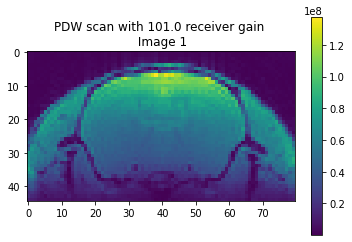

In [4]:
slice = 40 # Adjust this to change slice plotted

# Print preview of 4 scans with the various receiver gain
z1 = np.rot90(data[0][2][:,slice,:])
pos1 = plt.imshow(z1)
plt.title("PDW scan with {} receiver gain \n Image 1".format(data[0][1]))
plt.colorbar(pos1)
plt.show()

**Applying all the filters**

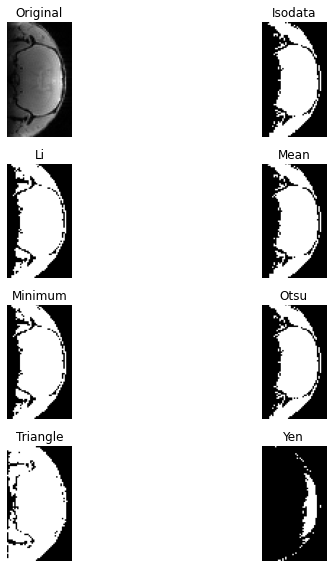

In [5]:
img = data[0][2]
fig, ax = try_all_threshold(data[0][2][:,slice,:], figsize=(10,8), verbose=False)
plt.show()

**Histogram of the Scan**

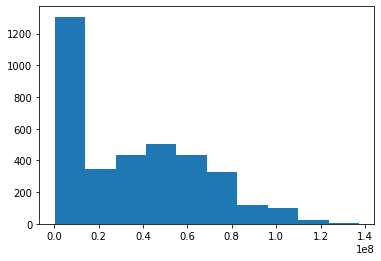

In [6]:
plt.hist(data[0][2][:,slice,:].flatten())
plt.show()

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

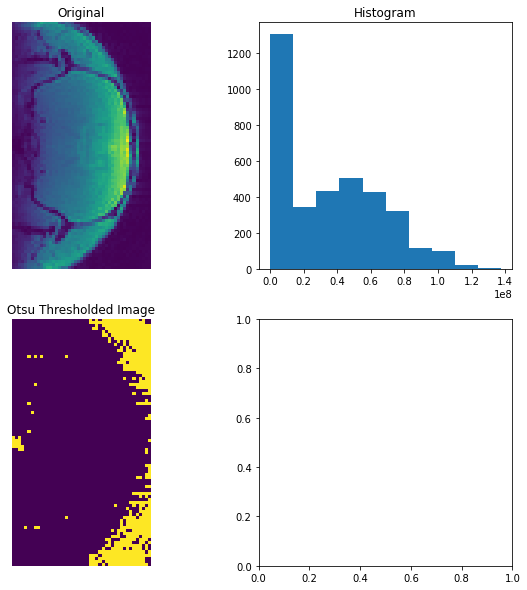

In [11]:
image = data[0][2][:,slice,:]
thresh = threshold_otsu(image)
binary = image < 0.2e7



fig, ax = plt.subplots(2,2,figsize=(10,10))
##ax = axes.ravel()



ax[0,0].imshow(image)
ax[0,0].set_title('Original')
ax[0,0].axis('off')

ax[0,1].hist(image.flatten())
ax[0,1].set_title('Histogram')


ax[1,0].imshow(binary)
ax[1,0].set_title('Otsu Thresholded Image')
ax[1,0].axis('off')


##this should be the histogram of the image multiplied 
binary.flatten()
ax[1,1].hist(binary.flatten())
ax[1,1].set_title('Histogram of thresholded image')


plt.show()

           
        
                    

[[False False False ...  True False False]
 [False False False ...  True False False]
 [False False False ...  True  True  True]
 ...
 [False False False ...  True False False]
 [False False False ...  True False False]
 [False False False ...  True  True False]]


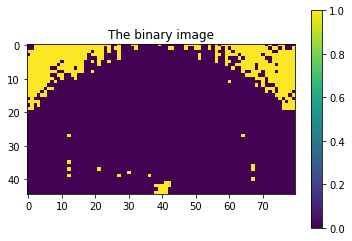

In [12]:
print(binary)
binary.shape
binary_cut = binary 
# Print preview of 4 scans with the various receiver gain
z2 = np.rot90(binary)
pos2 = plt.imshow(z2)
plt.title("The binary image")
plt.colorbar(pos2)
plt.show()




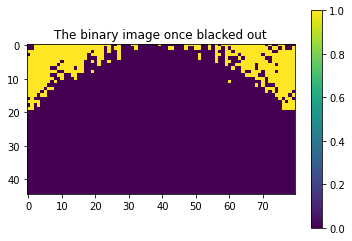

In [14]:
binary_cut[0 : 80, 0 : 25]  = 0

# Print preview of 4 scans with the various receiver gain
z3 = np.rot90(binary_cut)
pos3 = plt.imshow(z3)
plt.title("The binary image once blacked out")
plt.colorbar(pos3)
plt.show()

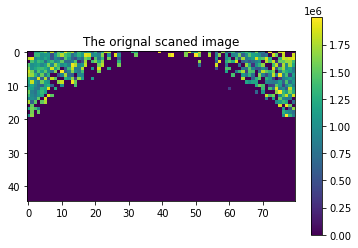

In [16]:
##apply the binary thresholded to the image 
result = image*binary_cut

# Print preview of 4 scans with the various receiver gain
z4 = np.rot90(result)
pos4 = plt.imshow(z4)
plt.title("Isolated background")
plt.colorbar(pos4)
plt.show()


In [ ]:
##Do it in 3D 

